## OMDB API

In [5]:
# Import package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=a5839d84&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  556,761
imdbID:  tt1285016
Type:  movie
DVD:

## WIKIPEDIA API

In [6]:
# Import package
import requests

# Assign URL to variable: url
url = "https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza"

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a  wood-fired oven. In formal settings, like a restaurant, pizza is  eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.   
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since become popular in many countries. Today it is one of the most popular foods in the world and a common fast food item in Europe and North America, available at  pizzerias (restaurants specializing in pizza),  restaurants offering Me

## TWITTER API
https://apps.twitter.com/app/15390161/show

In [8]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "924395818760753152-G6hlZZPZGP2WvrhwotTNYcTiNo9xvh8"
access_token_secret = "35eYt1KeY8fIj4vzaGmJU1SVmqvyB7TCGdbBbF7AsURRK"
consumer_key = "W1z6RVExcvu2JSOY7viSQZxFf"
consumer_secret = "ycKHMo3Inw8HgETRFM0mRsvDeLzMOjdXPfUc9XYLzTW3HizWBS"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [9]:
#### Predefined on Github
# https://gist.github.com/hugobowne/18f1c0c0709ed1a52dc5bcd462ac69f4#file-tweet_listener-py
import json
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

#### Streaming tweets

In [10]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

In [ ]:
# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

In [11]:
# Load and explore your Twitter data
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = "tweets.txt"

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

In [12]:
# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


#### Twitter data to DataFrame

In [13]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=["text", "lang"])

# Print head of DataFrame
print(df.head())

                                                text lang
0  Melania Trump ha già inquadrato Kasper: quello...   it
1  RT @EpochTimes: #SPYGATE: Clinton Campaign Rel...   en
2  RT @ConMijente: Juliet is a 1 y/o who was ripp...   en
3  RT @Kevin_Shipp: Nancy Pelosi attempts to cont...   en
4  RT @WildPalmsLtd: Look. It's not surprising th...   en


In [14]:
# Define word_in_text
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

#### A little bit of Twitter text analysis

In [15]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text("trump", row["text"])
    sanders += word_in_text("sanders", row["text"])
    cruz += word_in_text("cruz", row["text"])

#### Plotting Twitter Data

[Text(0, 0.5, 'count')]

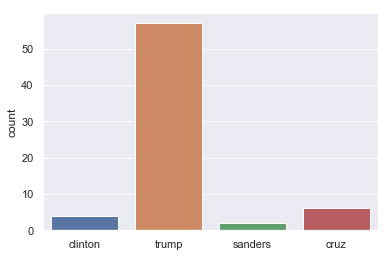

In [17]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")